In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from textblob import TextBlob
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud
from nltk.stem import WordNetLemmatizer
# sklearn
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\yutao\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
tweets = pd.read_csv("vaccination_all_tweets.csv")
tweets = tweets.dropna(axis=0) # TODO: discuss
tweets.head()

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet
0,1340539111971516416,Rachel Roh,"La Crescenta-Montrose, CA",Aggregator of Asian American news; scanning di...,2009-04-08 17:52:46,405,1692,3247,False,2020-12-20 06:06:44,Same folks said daikon paste could treat a cyt...,['PfizerBioNTech'],Twitter for Android,0,0,False
2,1337858199140118533,eli🇱🇹🇪🇺👌,Your Bed,"heil, hydra 🖐☺",2020-06-25 23:30:28,10,88,155,False,2020-12-12 20:33:45,#coronavirus #SputnikV #AstraZeneca #PfizerBio...,"['coronavirus', 'SputnikV', 'AstraZeneca', 'Pf...",Twitter for Android,0,0,False
6,1337851215875608579,Gunther Fehlinger,"Austria, Ukraine and Kosovo",End North Stream 2 now - the pipeline of corru...,2013-06-10 17:49:22,2731,5001,69344,False,2020-12-12 20:06:00,it is a bit sad to claim the fame for success ...,['vaccination'],Twitter Web App,0,4,False
9,1337842295857623042,Ch.Amjad Ali,Islamabad,#ProudPakistani #LovePakArmy #PMIK @insafiansp...,2012-11-12 04:18:12,671,2368,20469,False,2020-12-12 19:30:33,#CovidVaccine \n\nStates will start getting #C...,"['CovidVaccine', 'COVID19Vaccine', 'US', 'paku...",Twitter Web App,0,0,False
10,1337841934170255365,Tamer Yazar,Turkey-Israel,"Im Market Analyst, also Editor... working (fre...",2009-09-17 16:45:16,1302,78,339,False,2020-12-12 19:29:07,"while deaths are closing in on the 300,000 mar...","['PfizerBioNTech', 'Vaccine']",Twitter Web App,0,0,False


In [3]:
def remove_emoji(text):
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               u"\U00002500-\U00002BEF"  # chinese char
                               u"\U00002702-\U000027B0"
                               u"\U00002702-\U000027B0"
                               u"\U000024C2-\U0001F251"
                               u"\U0001f926-\U0001f937"
                               u"\U00010000-\U0010ffff"
                               u"\u2640-\u2642"
                               u"\u2600-\u2B55"
                               u"\u200d"
                               u"\u23cf"
                               u"\u23e9"
                               u"\u231a"
                               u"\ufe0f"  # dingbats
                               u"\u3030"
                               "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)


def tokenizer(text):
    return text.split()

tweets = pd.read_csv("vaccination_all_tweets.csv")
tweets = tweets.dropna(axis=0) # TODO: discuss
original_text = tweets["text"].copy(deep=True)
original_text.iloc[6]

# clean text d
def clean_text(text):
    text = re.sub(r"http\S+", "", text) #rm websites
    text = re.sub(r"\s+[a-zA-Z]\s+", " ", text) # rm single characters 
    text = re.sub(r"\s\s+","", text) # rm multiple spaces
    text = re.sub(r"#","", text) # rm hashtags
    text = re.sub(r"[(,?!)]","", text) # rm special characters 
    text = re.sub("@[^\s]+", "", text) # rm @twitter_id
    emoticons = re.findall("(?::|;|=)(?:-)?(?:\)|\(|D|P)", text)
    text = (re.sub("[\W]+", " ", text.lower()) + " ".join(emoticons).replace("-", "")).strip()
    return text

tweets["text"] = tweets["text"].apply(lambda x: clean_text(x))
tweets["text"]

0        same folks said daikon paste could treat cytok...
2        coronavirus sputnikv astrazeneca pfizerbiontec...
6        it is bit sad to claim the fame for success of...
9        covidvaccinestates will start getting covid19v...
10       while deaths are closing in on the 300000 mark...
                               ...                        
33708    zakharova russia has offered foreign embassy s...
33712    breakingthe information attack targeting sputn...
33713    pity as my personal preference would have been...
33714    who in close contact with russia on sputnikv c...
33716    breakingus targets europe in smear campaign ag...
Name: text, Length: 19616, dtype: object

In [4]:
# tweets_data.head(2)
count = CountVectorizer()
docs = np.array(tweets["text"])
bag = count.fit_transform(docs)
np.array(tweets["text"])

from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.stem.porter import PorterStemmer 

def identify_tokenizer(text):
    return text

#lower idf value, less unique the word is to a particular text
tfidf = TfidfVectorizer(preprocessor="".join,
                         use_idf=True, 
                         norm = "l2",
                         smooth_idf=True)
np.set_printoptions(precision=2)
tfidf_vectors = tfidf.fit_transform(docs)

tfidf_first = tfidf_vectors[0]
pd.DataFrame(tfidf_first.toarray())

porter = PorterStemmer()
def tokenizer_porter(text):
    return [porter.stem(word) for word in text.split()]

tweets["stemmed"] = tweets["text"].apply(lambda x: tokenizer_porter(x))

from nltk.corpus import stopwords
nltk.download("stopwords")
stop = stopwords.words("english")


stop = ['i', 'me', 'my', 'myself', 'we', 'our', 'ours',
        'ourselves', 'you', "you're", "you've", "you'll", 
        "you'd", 'your', 'yours', 'yourself', 'yourselves',
        'he', 'him', 'his', 'himself', 'she', "she's", 'her',
        'hers', 'herself', 'it', "it's", 'its', 'itself', 'they',
        'them', 'their', 'theirs', 'themselves', 'what', 'which', 
        'who', 'whom', 'this', 'that', "that'll", 'these', 'those',
        'a', 'an', 'the', 'and', 'if', 'or', 'because', 'as', 
        'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 
        'between', 'into', 'through', 'during', 'before', 
        'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 
        'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 
        'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 
        'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 
        'such', 'only', 'own', 'same', 'so', 'than', 
        'too', 'very', 's', 't', 'just',  'now', 'd', 'll', 'm', 'o', 're', 've', 'y']

nltk.download("stopwords")

def remove_stop_words(text):
    stop = stopwords.words("english")
    return [word for word in text if word not in stop]

def join_words(text):
    return ' '.join(text)

tweets["stop_removed"] = tweets["stemmed"].apply(lambda x: remove_stop_words(x))
tweets["stop_removed"] = tweets["stemmed"].apply(lambda x: join_words(x))

tweets.head()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\yutao\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\yutao\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet,stemmed,stop_removed
0,1340539111971516416,Rachel Roh,"La Crescenta-Montrose, CA",Aggregator of Asian American news; scanning di...,2009-04-08 17:52:46,405,1692,3247,False,2020-12-20 06:06:44,same folks said daikon paste could treat cytok...,['PfizerBioNTech'],Twitter for Android,0,0,False,"[same, folk, said, daikon, past, could, treat,...",same folk said daikon past could treat cytokin...
2,1337858199140118533,eli🇱🇹🇪🇺👌,Your Bed,"heil, hydra 🖐☺",2020-06-25 23:30:28,10,88,155,False,2020-12-12 20:33:45,coronavirus sputnikv astrazeneca pfizerbiontec...,"['coronavirus', 'SputnikV', 'AstraZeneca', 'Pf...",Twitter for Android,0,0,False,"[coronaviru, sputnikv, astrazeneca, pfizerbion...",coronaviru sputnikv astrazeneca pfizerbiontech...
6,1337851215875608579,Gunther Fehlinger,"Austria, Ukraine and Kosovo",End North Stream 2 now - the pipeline of corru...,2013-06-10 17:49:22,2731,5001,69344,False,2020-12-12 20:06:00,it is bit sad to claim the fame for success of...,['vaccination'],Twitter Web App,0,4,False,"[it, is, bit, sad, to, claim, the, fame, for, ...",it is bit sad to claim the fame for success of...
9,1337842295857623042,Ch.Amjad Ali,Islamabad,#ProudPakistani #LovePakArmy #PMIK @insafiansp...,2012-11-12 04:18:12,671,2368,20469,False,2020-12-12 19:30:33,covidvaccinestates will start getting covid19v...,"['CovidVaccine', 'COVID19Vaccine', 'US', 'paku...",Twitter Web App,0,0,False,"[covidvaccinest, will, start, get, covid19vacc...",covidvaccinest will start get covid19vaccin mo...
10,1337841934170255365,Tamer Yazar,Turkey-Israel,"Im Market Analyst, also Editor... working (fre...",2009-09-17 16:45:16,1302,78,339,False,2020-12-12 19:29:07,while deaths are closing in on the 300000 mark...,"['PfizerBioNTech', 'Vaccine']",Twitter Web App,0,0,False,"[while, death, are, close, in, on, the, 300000...",while death are close in on the 300000 mark mi...


In [5]:
def polarity(text):
    testimonial = TextBlob(text)
    polarity = testimonial.sentiment.polarity
    return polarity


def subjectivity(text):
    testimonial = TextBlob(text)
    subjectivity = testimonial.subjectivity
    return subjectivity


def senti(text, polarity_threshold=0):
    testimonial = TextBlob(text)
    senti = testimonial.sentiment.polarity
    
    if senti >= polarity_threshold:
        return 'positive'
#     elif np.abs(senti) == polarity_threshold:
#         return 0
    else:
        return 'negative'
    

tweets['polarity'] = tweets['stop_removed'].apply(lambda x: polarity(x))
tweets['subjectivity'] = tweets['stop_removed'].apply(lambda x: subjectivity(x))
tweets['sentiment'] = tweets['stop_removed'].apply(lambda x: senti(x))


In [6]:
tweets.head()

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,...,hashtags,source,retweets,favorites,is_retweet,stemmed,stop_removed,polarity,subjectivity,sentiment
0,1340539111971516416,Rachel Roh,"La Crescenta-Montrose, CA",Aggregator of Asian American news; scanning di...,2009-04-08 17:52:46,405,1692,3247,False,2020-12-20 06:06:44,...,['PfizerBioNTech'],Twitter for Android,0,0,False,"[same, folk, said, daikon, past, could, treat,...",same folk said daikon past could treat cytokin...,-0.125,0.187500,negative
2,1337858199140118533,eli🇱🇹🇪🇺👌,Your Bed,"heil, hydra 🖐☺",2020-06-25 23:30:28,10,88,155,False,2020-12-12 20:33:45,...,"['coronavirus', 'SputnikV', 'AstraZeneca', 'Pf...",Twitter for Android,0,0,False,"[coronaviru, sputnikv, astrazeneca, pfizerbion...",coronaviru sputnikv astrazeneca pfizerbiontech...,0.000,0.033333,positive
6,1337851215875608579,Gunther Fehlinger,"Austria, Ukraine and Kosovo",End North Stream 2 now - the pipeline of corru...,2013-06-10 17:49:22,2731,5001,69344,False,2020-12-12 20:06:00,...,['vaccination'],Twitter Web App,0,4,False,"[it, is, bit, sad, to, claim, the, fame, for, ...",it is bit sad to claim the fame for success of...,-0.100,0.500000,negative
9,1337842295857623042,Ch.Amjad Ali,Islamabad,#ProudPakistani #LovePakArmy #PMIK @insafiansp...,2012-11-12 04:18:12,671,2368,20469,False,2020-12-12 19:30:33,...,"['CovidVaccine', 'COVID19Vaccine', 'US', 'paku...",Twitter Web App,0,0,False,"[covidvaccinest, will, start, get, covid19vacc...",covidvaccinest will start get covid19vaccin mo...,0.000,0.000000,positive
10,1337841934170255365,Tamer Yazar,Turkey-Israel,"Im Market Analyst, also Editor... working (fre...",2009-09-17 16:45:16,1302,78,339,False,2020-12-12 19:29:07,...,"['PfizerBioNTech', 'Vaccine']",Twitter Web App,0,0,False,"[while, death, are, close, in, on, the, 300000...",while death are close in on the 300000 mark mi...,0.250,0.333333,positive


In [7]:
X_train, X_test, y_train, y_test = train_test_split(tweets["stop_removed"], tweets["sentiment"], 
                                                    test_size = 0.2, random_state=123,stratify= tweets["sentiment"])

In [8]:
type(X_train)

pandas.core.series.Series

In [9]:
# Addeed for GridSearch

Grid_X_train = X_train.values
Grid_y_train = y_train.values
Grid_X_test = X_test.values
Grid_y_test = y_test.values

In [10]:
vectoriser = TfidfVectorizer()
vectoriser.fit(X_train)
print('No. of feature_words: ', len(vectoriser.get_feature_names()))

X_train = vectoriser.transform(X_train)
X_test  = vectoriser.transform(X_test)

No. of feature_words:  15329


In [11]:
def model_Evaluate(model):
    # Predict values for Test dataset
    y_pred = model.predict(X_test)
    # Print the evaluation metrics for the dataset.
    print(classification_report(y_test, y_pred))
    # Compute and plot the Confusion matrix
    cf_matrix = confusion_matrix(y_pred, y_test)
#     print(cf_matrix)
    categories = ['Negative','Positive']
    group_names = ['True Neg ','False Pos ', 'False Neg ','True Pos ']
    group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten() / np.sum(cf_matrix)]
    labels = [f'{v1} n {v2}' for v1, v2 in zip(group_names,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(cf_matrix, annot = labels, cmap = 'Blues',fmt = '',
    xticklabels = categories, yticklabels = categories)
    plt.xlabel("Predicted values", fontdict = {'size':14}, labelpad = 10)
    plt.ylabel("Actual values" , fontdict = {'size':14}, labelpad = 10)
    plt.title ("Confusion Matrix", fontdict = {'size':18}, pad = 20)

Test Accuracy: 96.101%
              precision    recall  f1-score   support

    negative       0.87      0.69      0.77       372
    positive       0.97      0.99      0.98      3552

    accuracy                           0.96      3924
   macro avg       0.92      0.84      0.87      3924
weighted avg       0.96      0.96      0.96      3924



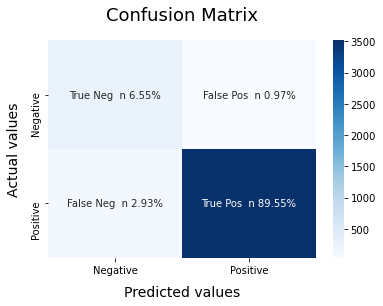

In [12]:
from sklearn.ensemble import RandomForestClassifier
text_classifier = RandomForestClassifier(n_estimators=200, random_state=0)
text_classifier.fit(X_train, y_train)
predictions = text_classifier.predict(X_test)
print(f"Test Accuracy: {text_classifier.score(X_test, y_test)*100:0.3f}%")
model_Evaluate(text_classifier)

              precision    recall  f1-score   support

    negative       0.87      0.09      0.16       372
    positive       0.91      1.00      0.95      3552

    accuracy                           0.91      3924
   macro avg       0.89      0.54      0.56      3924
weighted avg       0.91      0.91      0.88      3924

Test Accuracy: 91.233%


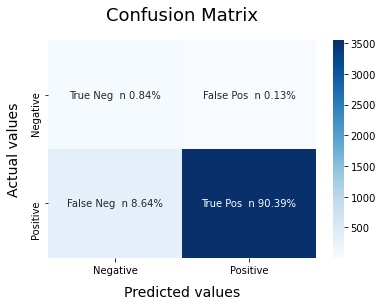

In [38]:
BNBmodel = BernoulliNB()
BNBmodel.fit(X_train, y_train)
model_Evaluate(BNBmodel)
y_pred1 = BNBmodel.predict(X_test)
print(f"Test Accuracy: {BNBmodel.score(X_test, y_test)*100:0.3f}%")

              precision    recall  f1-score   support

    negative       0.92      0.75      0.83       372
    positive       0.97      0.99      0.98      3552

    accuracy                           0.97      3924
   macro avg       0.95      0.87      0.91      3924
weighted avg       0.97      0.97      0.97      3924

Test Accuracy: 97.044%


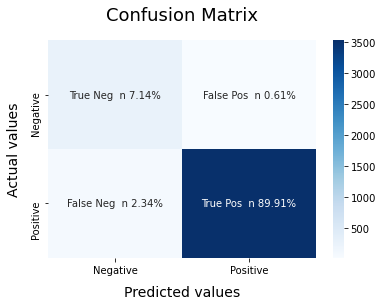

In [14]:
SVCmodel = LinearSVC()
SVCmodel.fit(X_train, y_train)
model_Evaluate(SVCmodel)
y_pred2 = SVCmodel.predict(X_test)
print(f"Test Accuracy: {SVCmodel.score(X_test, y_test)*100:0.3f}%")

              precision    recall  f1-score   support

    negative       0.92      0.22      0.35       372
    positive       0.92      1.00      0.96      3552

    accuracy                           0.92      3924
   macro avg       0.92      0.61      0.66      3924
weighted avg       0.92      0.92      0.90      3924

Test Accuracy: 92.406%


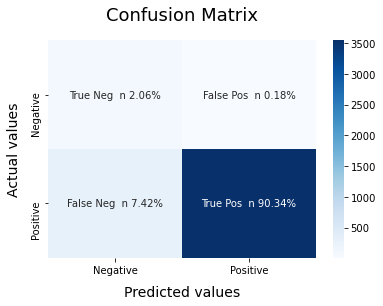

In [15]:
LRmodel = LogisticRegression()
LRmodel.fit(X_train, y_train)
model_Evaluate(LRmodel)
y_pred3 = LRmodel.predict(X_test)
print(f"Test Accuracy: {LRmodel.score(X_test, y_test)*100:0.3f}%")

In [16]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

In [29]:
# GridSearch for SVC

tfidf = TfidfVectorizer(strip_accents=None,
                        lowercase=False,
                        preprocessor=None)
param_grid = [{"vect__ngram_range": [(1,1)],
              "vect__stop_words":[stop,None],
              "vect__tokenizer":[tokenizer,
                               tokenizer_porter],
              "clf__penalty":[11,12],
              "clf__C":[1.0]},
              {"vect__ngram_range":[(1,1)],
               "vect__stop_words": [stop, None],
               "vect__tokenizer": [tokenizer,
                                 tokenizer_porter],
               "vect__use_idf": [False],
               "vect__norm":[None],
               "clf__penalty": ["l1", "l2"],
               "clf__C": [1.0]}]
lr_tfidf = Pipeline([("vect", tfidf),
                     ("clf", LinearSVC(random_state = 0))])

gs_lr_tfidf = GridSearchCV(lr_tfidf, param_grid,scoring = "accuracy",
                          cv = 5, verbose=2, n_jobs = -1)
gs_lr_tfidf.fit(Grid_X_train, Grid_y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   25.5s
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:  1.1min finished


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('vect',
                                        TfidfVectorizer(lowercase=False)),
                                       ('clf', LinearSVC(random_state=0))]),
             n_jobs=-1,
             param_grid=[{'clf__C': [1.0], 'clf__penalty': [11, 12],
                          'vect__ngram_range': [(1, 1)],
                          'vect__stop_words': [['i', 'me', 'my', 'myself', 'we',
                                                'our', 'ours', 'ourselves',
                                                'you', "you're", "you've",
                                                "you'll", "you'd", 'your',
                                                'yours', 'yourself...
                                                'our', 'ours', 'ourselves',
                                                'you', "you're", "you've",
                                                "you'll", "you'd", 'your',
                            

In [30]:
gs_lr_tfidf.best_params_

{'clf__C': 1.0,
 'clf__penalty': 'l2',
 'vect__ngram_range': (1, 1),
 'vect__norm': None,
 'vect__stop_words': None,
 'vect__tokenizer': <function __main__.tokenizer(text)>,
 'vect__use_idf': False}

In [31]:
print(f"Training Accuracy: {gs_lr_tfidf.best_score_*100:0.3f}%")
clf = gs_lr_tfidf.best_estimator_
print(f"Test Accuracy: {clf.score(Grid_X_test, Grid_y_test)*100:0.3f}%")

Training Accuracy: 97.139%
Test Accuracy: 97.324%


In [32]:
# GridSearch for Logistic Regression

tfidf = TfidfVectorizer(strip_accents=None,
                        lowercase=False,
                        preprocessor=None)
param_grid = [{"vect__ngram_range": [(1,1)],
              "vect__stop_words":[stop,None],
              "vect__tokenizer":[tokenizer,
                               tokenizer_porter],
              "clf__penalty":[11,12],
              "clf__C":[1.0]},
              {"vect__ngram_range":[(1,1)],
               "vect__stop_words": [stop, None],
               "vect__tokenizer": [tokenizer,
                                 tokenizer_porter],
               "vect__use_idf": [False],
               "vect__norm":[None],
               "clf__penalty": ["l1", "l2"],
               "clf__C": [1.0]}]
lr_tfidf = Pipeline([("vect", tfidf),
                     ("clf", LogisticRegression(random_state = 0))])

gs_lr_tfidf = GridSearchCV(lr_tfidf, param_grid,scoring = "accuracy",
                          cv = 5, verbose=2, n_jobs = -1)
gs_lr_tfidf.fit(Grid_X_train, Grid_y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   16.4s
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:  1.1min finished
C:\Users\yutao\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('vect',
                                        TfidfVectorizer(lowercase=False)),
                                       ('clf',
                                        LogisticRegression(random_state=0))]),
             n_jobs=-1,
             param_grid=[{'clf__C': [1.0], 'clf__penalty': [11, 12],
                          'vect__ngram_range': [(1, 1)],
                          'vect__stop_words': [['i', 'me', 'my', 'myself', 'we',
                                                'our', 'ours', 'ourselves',
                                                'you', "you're", "you've",
                                                "you'll", "you'd", 'your',
                                                'yours',...
                                                'our', 'ours', 'ourselves',
                                                'you', "you're", "you've",
                                                "you'll", "you'd

In [33]:
gs_lr_tfidf.best_params_

{'clf__C': 1.0,
 'clf__penalty': 'l2',
 'vect__ngram_range': (1, 1),
 'vect__norm': None,
 'vect__stop_words': None,
 'vect__tokenizer': <function __main__.tokenizer(text)>,
 'vect__use_idf': False}

In [34]:
print(f"Training Accuracy: {gs_lr_tfidf.best_score_*100:0.3f}%")
clf = gs_lr_tfidf.best_estimator_
print(f"Test Accuracy: {clf.score(Grid_X_test, Grid_y_test)*100:0.3f}%")

Training Accuracy: 95.380%
Test Accuracy: 95.515%


In [53]:
# GridSearch for Random forest

tfidf = TfidfVectorizer(strip_accents=None,
                        lowercase=False,
                        preprocessor=None)
param_grid = [{"vect__ngram_range": [(1,1)],
              "vect__stop_words":[stop,None],
              "vect__tokenizer":[tokenizer,
                               tokenizer_porter]},
#              "clf__penalty":[11,12],
#              "clf__C":[1.0]},
              {"vect__ngram_range":[(1,1)],
               "vect__stop_words": [stop, None],
               "vect__tokenizer": [tokenizer,
                                 tokenizer_porter],
               "vect__use_idf": [False],
               "vect__norm":[None]}]
#               "clf__penalty": ["l1", "l2"],
#               "clf__C": [1.0]}]
lr_tfidf = Pipeline([("vect", tfidf),
                     ("clf", RandomForestClassifier(random_state = 0))])

gs_lr_tfidf = GridSearchCV(lr_tfidf, param_grid,scoring = "accuracy",
                          cv = 5, verbose=2, n_jobs = -1)
gs_lr_tfidf.fit(Grid_X_train, Grid_y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:  1.7min finished


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('vect',
                                        TfidfVectorizer(lowercase=False)),
                                       ('clf',
                                        RandomForestClassifier(random_state=0))]),
             n_jobs=-1,
             param_grid=[{'vect__ngram_range': [(1, 1)],
                          'vect__stop_words': [['i', 'me', 'my', 'myself', 'we',
                                                'our', 'ours', 'ourselves',
                                                'you', "you're", "you've",
                                                "you'll", "you'd", 'your',
                                                'yours', 'yourself',
                                                'yourselves', 'he', 'him'...
                                                'our', 'ours', 'ourselves',
                                                'you', "you're", "you've",
                                           

In [54]:
gs_lr_tfidf.best_params_

{'vect__ngram_range': (1, 1),
 'vect__norm': None,
 'vect__stop_words': None,
 'vect__tokenizer': <function __main__.tokenizer_porter(text)>,
 'vect__use_idf': False}

In [55]:
print(f"Training Accuracy: {gs_lr_tfidf.best_score_*100:0.3f}%")
clf = gs_lr_tfidf.best_estimator_
print(f"Test Accuracy: {clf.score(Grid_X_test, Grid_y_test)*100:0.3f}%")

Training Accuracy: 96.387%
Test Accuracy: 96.611%


In [4]:
# Added for fit best Params of SVM
best_vetorizer = TfidfVectorizer(ngram_range(1,1),
                                 norm = None,
                                 stop_words = None, 
                                 tokenizer = tokenizer,
                                 use_idf = False)
best_vectoriser.fit(X_train)
best_X_train = best_vectoriser.transform(X_train)
best_X_test = vectoriser.transform(X_test)

NameError: name 'TfidfVectorizer' is not defined